### TASK 1

In [2]:
import pandas as pd
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

### Observations
1. The dataset has a total of 7050 rows signifying the data was collected by oberving a total of 7050 posts.
2. The dataset has four additional empty columns.

In [4]:
#Deleting the four empty columns.
del df['Column1']
del df['Column2']
del df['Column3']
del df['Column4']

In [5]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### Observations
1. Most posts observed received few reactions. 75% of the posts received less than 220 reactions.
2. Most posts received more likes compared to other reaction types. The 75th percentile for likes was approximately nine times that of comments.

In [6]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [7]:
df.shape

(7050, 12)

In [8]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [9]:
#Transforming the status_type into a category marked by a integer label.
df['status_type']=df['status_type'].astype('category')
df['status_type_label']=df['status_type'].cat.codes
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_label
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1


### TASK 2

In [32]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
#Selecting the right columns to use for training the algorithm.
#Only the columns with the number of different types of reactions
#and the total number of reactions was used.
data = df.iloc[:,3:13]
Scaled_data = Scaler.fit_transform(data)
x = pd.DataFrame(Scaled_data)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1.000000
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.333333
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,1.000000
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.333333
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.333333


Text(0.5, 1.0, 'Elbow plot')

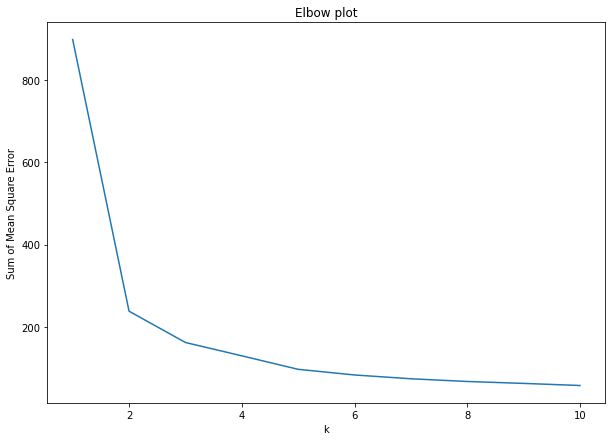

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Mean_Square_Error=[]
k_range=range(1,11)
for k in k_range:
    x=KMeans(n_clusters=k)
    x.fit(Scaled_data)
    Mean_Square_Error.append(x.inertia_)
plt.figure(figsize=(10,7))
plt.xlabel('k')
plt.ylabel('Sum of Mean Square Error')
plt.plot(k_range,Mean_Square_Error)
plt.title('Elbow plot')

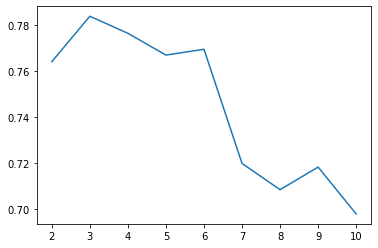

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
sil = []
k_range = range(2,11)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in k_range:
  kmeans = KMeans(n_clusters = k).fit(Scaled_data)
  labels = kmeans.labels_
  sil.append(silhouette_score(Scaled_data, labels, metric = 'euclidean'))
plt.plot(k_range,sil)

### Best value of k
The elbow and silhouette plots above clearly show that the optimum number of clusters from the data is three.

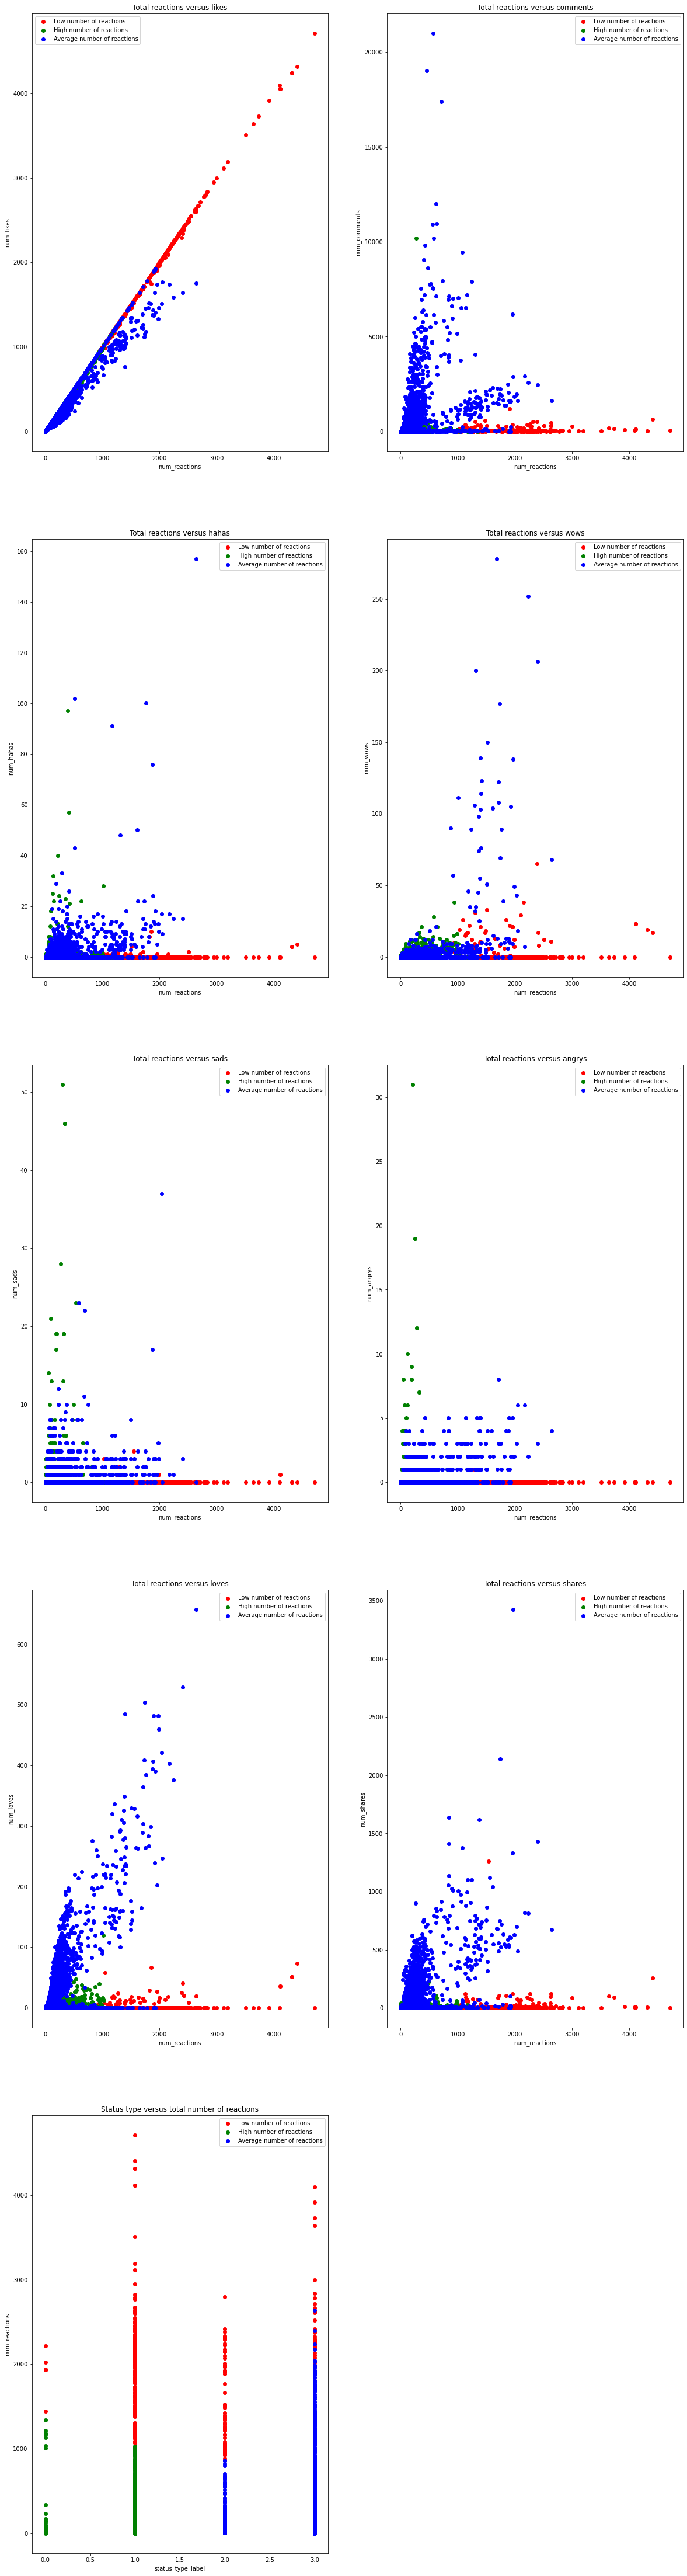

In [33]:
from sklearn.cluster import KMeans
df['Cluster']=KMeans(n_clusters=3).fit_predict(Scaled_data)
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
fig = plt.figure(figsize=(20,80))
fig.add_subplot(5,2,1)
plt.scatter(df1['num_reactions'],df1['num_likes'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_likes'],color='green',label='High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_likes'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_likes')
plt.title('Total reactions versus likes')
plt.legend()
fig.add_subplot(5,2,2)
plt.scatter(df1['num_reactions'],df1['num_comments'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_comments'],color='green',label='High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_comments'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.title('Total reactions versus comments')
plt.legend()
fig.add_subplot(5,2,3)
plt.scatter(df1['num_reactions'],df1['num_hahas'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_hahas'],color='green',label='High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_hahas'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_hahas')
plt.title('Total reactions versus hahas')
plt.legend()
fig.add_subplot(5,2,4)
plt.scatter(df1['num_reactions'],df1['num_wows'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_wows'],color='green',label='High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_wows'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_wows')
plt.title('Total reactions versus wows')
plt.legend()
fig.add_subplot(5,2,5)
plt.scatter(df1['num_reactions'],df1['num_sads'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_sads'],color='green',label='High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_sads'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_sads')
plt.title('Total reactions versus sads')
plt.legend()
fig.add_subplot(5,2,6)
plt.scatter(df1['num_reactions'],df1['num_angrys'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_angrys'],color='green',label='High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_angrys'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_angrys')
plt.title('Total reactions versus angrys')
plt.legend()
fig.add_subplot(5,2,7)
plt.scatter(df1['num_reactions'],df1['num_loves'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_loves'],color='green',label='High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_loves'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_loves')
plt.title('Total reactions versus loves')
plt.legend()
fig.add_subplot(5,2,8)
plt.scatter(df1['num_reactions'],df1['num_shares'],color='red',label='Low number of reactions')
plt.scatter(df2['num_reactions'],df2['num_shares'],color='green',label= 'High number of reactions')
plt.scatter(df3['num_reactions'],df3['num_shares'],color='blue',label='Average number of reactions')
plt.xlabel('num_reactions')
plt.ylabel('num_shares')
plt.title('Total reactions versus shares')
plt.legend()
fig.add_subplot(5,2,9)
plt.scatter(df1['status_type_label'],df1['num_reactions'],color='red',label='Low number of reactions')
plt.scatter(df2['status_type_label'],df2['num_reactions'],color='green',label='High number of reactions')
plt.scatter(df3['status_type_label'],df3['num_reactions'],color='blue',label='Average number of reactions')
plt.xlabel('status_type_label')
plt.ylabel('num_reactions')
plt.title('Status type versus total number of reactions')
plt.legend()

### Brief description of the scatter plots
The data results in medium clusters that overlap onto each other. From the scatter plots, it is easily deduced that the three clusters are most likely based on the number of reactions. From the first subplot, one can deduce that num_likes is the greatest contributor to the overal num_reactions. Posts that receive more likes than other types of reactions are likely to have a higher number of total reactions compared to posts that have more of the other types of reactions.

In [41]:
from sklearn import metrics
metrics.rand_score(df['Cluster'],df['status_type_label'])

0.9252775857749552

In [42]:
from sklearn import metrics
metrics.adjusted_rand_score(df['Cluster'],df['status_type_label'])

0.850354088906488

### TASK 3

In [38]:
df2 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv')
df2.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2)
df3 = df2.iloc[:,1:5]
data = scale(df3)
pca.fit(data)

PCA(n_components=2)

In [24]:
pca.components_

array([[ 0.6264132 ,  0.57799922,  0.49626726, -0.16505215],
       [ 0.19538115,  0.25480203, -0.23856702,  0.91650854]])

In [40]:
pca = PCA(n_components=4)
pca.fit_transform(data)
pca.explained_variance_ratio_

array([0.57845054, 0.25650171, 0.14402362, 0.02102413])